In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, n_features=3,cluster_std=4.7, random_state=42)

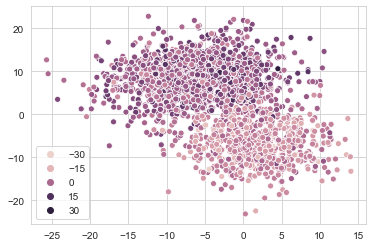

In [2]:
import seaborn as sns
sns.set_style("whitegrid")
#Scatter plot of train dataset
sns.scatterplot(X.T[0], X.T[1], X.T[2], color='g')

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

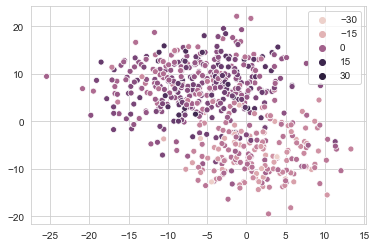

In [4]:
#Scatter plot of test dataset
sns.scatterplot(X_test.T[0], X_test.T[1],X_test.T[2],color='g')

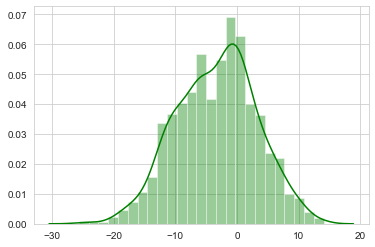

In [5]:
sns.distplot(X_train.T[0],color="g")

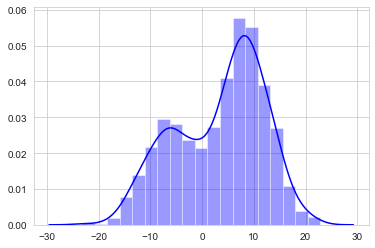

In [6]:
sns.distplot(X_train.T[1],color="b")

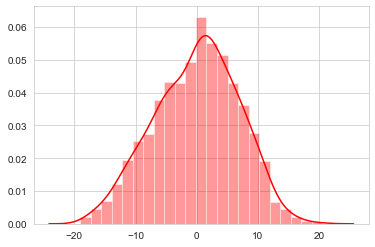

In [7]:
sns.distplot(X_train.T[2],color="r")

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=12, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9714285714285714
Accuracy of test: 0.7933333333333333


In [9]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       192
           1       0.94      0.98      0.96       198
           2       0.75      0.66      0.70       210

    accuracy                           0.79       600
   macro avg       0.79      0.80      0.79       600
weighted avg       0.79      0.79      0.79       600



In [10]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7924364834942249
Recall = 0.7954981361231361
Accuracy = 0.7933333333333333
F1 Score = 0.7924701551881252


#### Tuning

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
cart = DecisionTreeClassifier()

In [12]:
clf_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [13]:
clf_cv_model = GridSearchCV(cart, clf_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.8s finished


In [14]:
clf_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [15]:
clf_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3).fit(X_train, y_train)

In [16]:
y_pred = clf_tuned.predict(X_test)

In [17]:
clf_model = accuracy_score(y_test, y_pred)
print("clf model accuracy score : ",clf_model)

clf model accuracy score :  0.825


### XGBoost


In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [19]:
xgb_model = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [20]:
y_pred = xgb_model.predict(X_test)
model = accuracy_score(y_test, y_pred)
print("model accuracy score:", model)

model accuracy score: 0.7933333333333333


#### Tuning

In [21]:
xgb = XGBClassifier()

In [22]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [23]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.6min finished


In [24]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}

In [25]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 500, 
                                subsample= 0.6).fit(X_train, y_train)

In [26]:
y_pred = xgb_tuned.predict(X_test)

In [27]:
tuned_model = accuracy_score(y_test,y_pred)
print("tuned model accuracy score:", tuned_model)

tuned model accuracy score: 0.8216666666666667


In [28]:
# Metrics
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Precision = 0.8215527441787525
Recall = 0.8232789201539202
Accuracy = 0.8216666666666667
F1 Score = 0.8216697918424577
